# Task
Kriteria 2: Melakukan Seluruh Proses Analisis Data Mirip seperti berbagai materi latihan yang telah dibahas sebelumnya, Anda harus melakukan seluruh proses analisis data mulai dari mendefinisikan pertanyaan hingga membuat kesimpulan dari hasil analisis. Selain itu, proyek analisis data yang Anda buat harus memenuhi ketentuan berikut.

Minimal terdapat 2 buah pertanyaan bisnis (pertanyaan analisis) yang ingin dijawab melalui proses analisis data. Pertanyaan tersebut haruslah efektif sesuai dengan materi Mendefinisikan Pertanyaan Untuk Explorasi Data. Minimal terdapat 2 buah visualisasi data untuk menjawab pertanyaan bisnis yang telah dibuat. Kriteria 3: Proses Analisis Dibuat dalam Notebook yang Rapi Pada submission ini, Anda harus mengerjakan proyek analisis data menggunakan templat proyek yang telah disediakan. Tujuannya supaya proyek yang dibuat terdokumentasi dengan rapi. Templat yang dimaksud dapat diakses pada tautan berikut: templat notebook.

Kriteria 4: Membuat Dashboard Sederhana Menggunakan Streamlit Setelah melakukan proses analisis, selanjutnya Anda wajib membuat dashboard sebagai media untuk menyampaikan hasil analisis data secara interaktif. Pada proyek ini, Anda dapat membuat dashboard dengan streamlit mirip seperti materi latihan sebelumnya. Selain itu, pastikan bahwa dashboard Anda buat dapat berjalan dengan lancar di local.

dengan bahasa indonesia

Here is all the data you need:
"data_1.csv"

## Data loading

### Subtask:
Load the dataset "data_1.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "data_1.csv" into a pandas DataFrame and display the first 5 rows.



In [9]:
import pandas as pd
df = pd.read_csv('data_1.csv')
display(df.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Eksplorasi data

### Subtask:
Menjelajahi data yang dimuat untuk memahami karakteristiknya dan mengidentifikasi potensi hubungan antar variabel.

Periksa statistik dasar, periksa nilai yang hilang, selidiki distribusi variabel, dan jelajahi hubungan antar variabel, dengan fokus pada jumlah sewa dan cuaca/suhu.


Bentuk Data: (17379, 17)

Tipe Data:
 instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Statistik Deskriptif:
           instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    1303

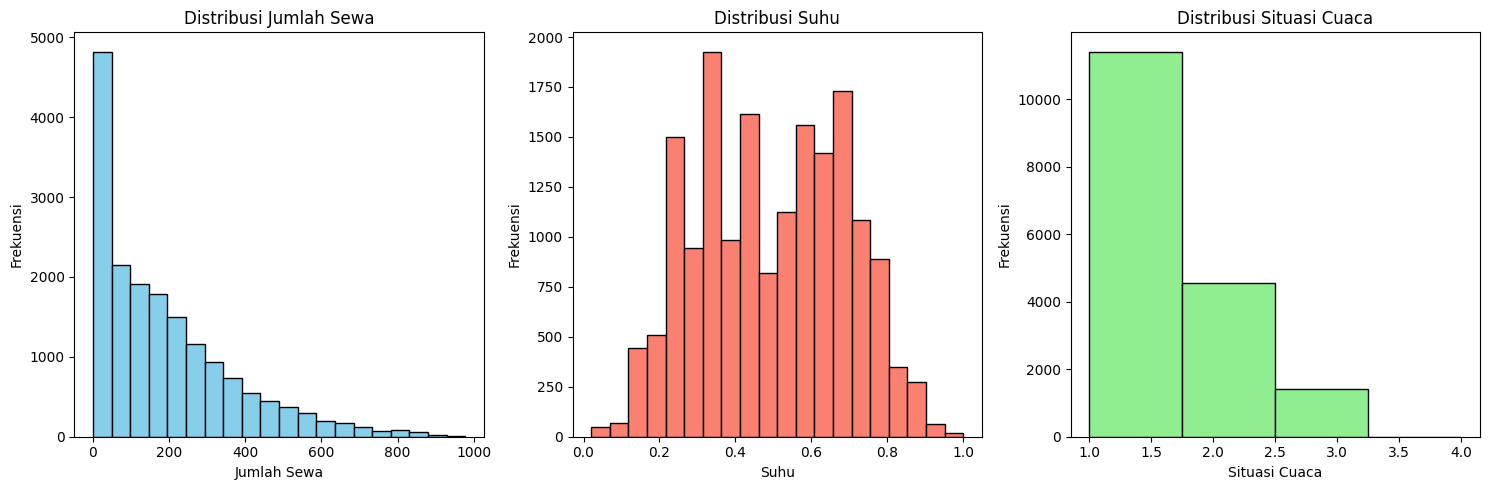

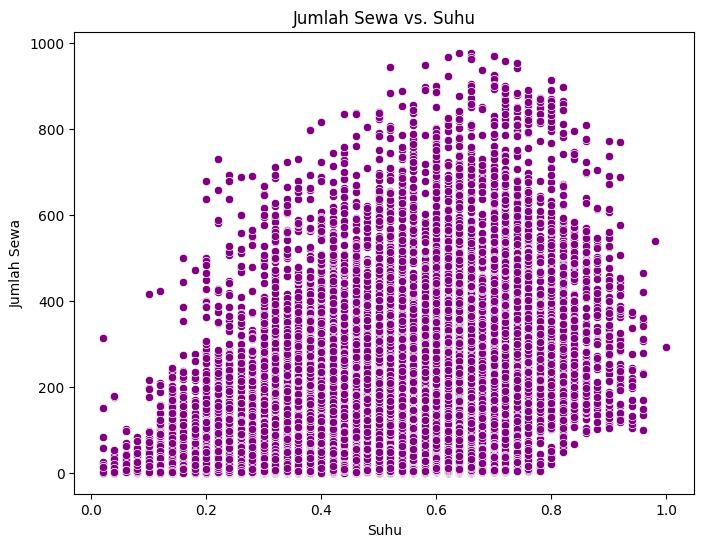

<ipython-input-11-271fa1cdd981>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=df, palette="Set3")


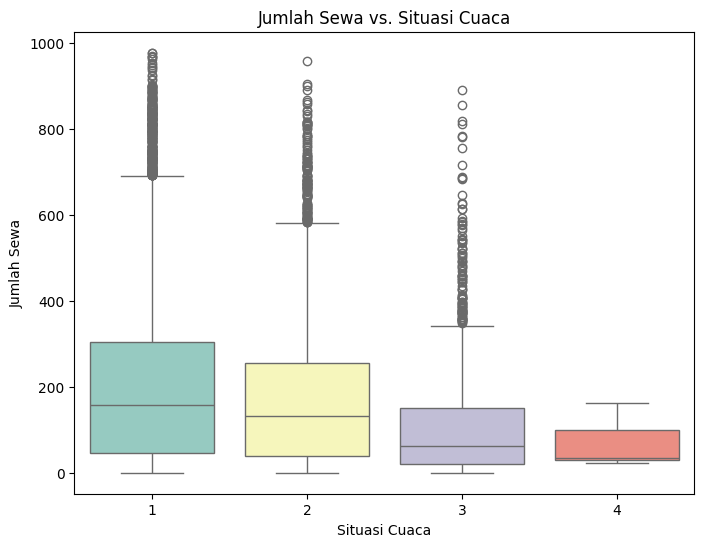

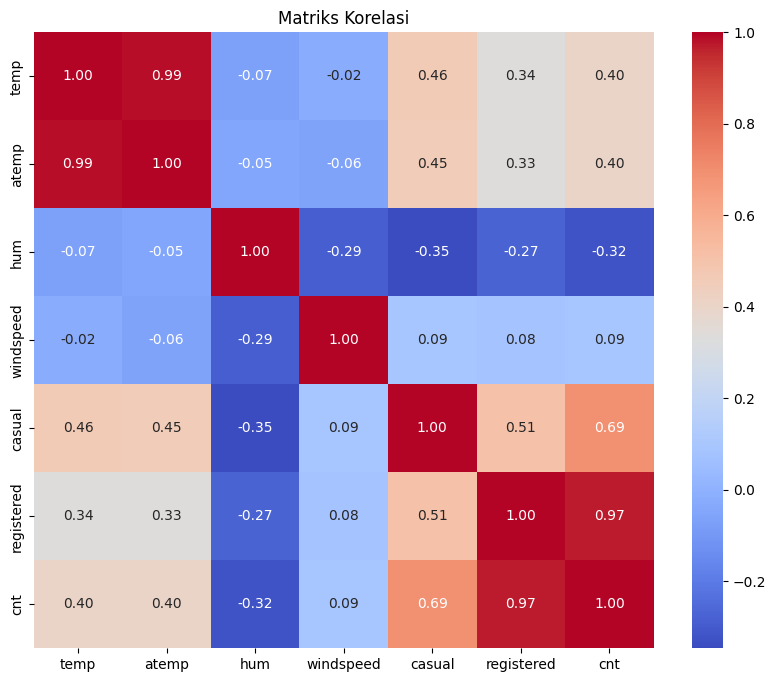

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistik dasar
print("Bentuk Data:", df.shape)
print("\nTipe Data:\n", df.dtypes)
print("\nStatistik Deskriptif:\n", df.describe())

# Nilai yang hilang
nilai_hilang = df.isnull().sum()
persentase_hilang = (nilai_hilang / len(df)) * 100
print("\nNilai yang Hilang:\n", nilai_hilang)
print("\nPersentase Nilai yang Hilang:\n", persentase_hilang)

# Distribusi variabel kunci
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['cnt'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Jumlah Sewa')
plt.xlabel('Jumlah Sewa')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 2)
plt.hist(df['temp'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribusi Suhu')
plt.xlabel('Suhu')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 3)
plt.hist(df['weathersit'], bins=4, color='lightgreen', edgecolor='black')
plt.title('Distribusi Situasi Cuaca')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()


# Hubungan antara jumlah sewa dan suhu
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='cnt', data=df, color='purple')
plt.title('Jumlah Sewa vs. Suhu')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Sewa')
plt.show()

# Hubungan antara jumlah sewa dan situasi cuaca
plt.figure(figsize=(8, 6))
sns.boxplot(x='weathersit', y='cnt', data=df, palette="Set3")
plt.title('Jumlah Sewa vs. Situasi Cuaca')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Jumlah Sewa')
plt.show()

# Matriks korelasi
matriks_korelasi = df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

## Data analysis

### Subtask:
Menentukan dua pertanyaan bisnis berdasarkan hasil eksplorasi data dan melakukan analisis data untuk menjawabnya.

Tentukan dua pertanyaan bisnis dan lakukan analisis data untuk menjawabnya menggunakan kerangka data yang disediakan. Pertanyaan harus didasarkan pada hubungan antara variabel seperti suhu, cuaca, dan jumlah sewa. Analisis akan melibatkan perhitungan dan agregasi.



In [12]:
# Pertanyaan Bisnis 1: Bagaimana suhu memengaruhi penyewaan sepeda?
# Hipotesis: Suhu yang lebih tinggi berkorelasi dengan jumlah penyewaan sepeda yang lebih tinggi.

# Kelompokkan data berdasarkan rentang suhu dan hitung rata-rata jumlah penyewaan untuk setiap rentang.
temp_bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
temp_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
df['temp_range'] = pd.cut(df['temp'], bins=temp_bins, labels=temp_labels, right=False)
temp_rental_avg = df.groupby('temp_range')['cnt'].mean()
print("Rata-rata Jumlah Sewa berdasarkan Rentang Suhu:\n", temp_rental_avg)

# Pertanyaan Bisnis 2: Bagaimana situasi cuaca yang berbeda memengaruhi penyewaan sepeda?
# Hipotesis: Cuaca cerah akan menghasilkan jumlah penyewaan sepeda yang lebih tinggi daripada cuaca buruk.

# Hitung rata-rata jumlah penyewaan untuk setiap situasi cuaca.
weather_rental_avg = df.groupby('weathersit')['cnt'].mean()
print("\nRata-rata Jumlah Sewa berdasarkan Situasi Cuaca:\n", weather_rental_avg)

# Analisis lebih lanjut untuk pertanyaan 1: Hitung korelasi antara suhu dan jumlah penyewaan.
correlation_temp_cnt = df['temp'].corr(df['cnt'])
print("\nKorelasi antara Suhu dan Jumlah Sewa:", correlation_temp_cnt)

Rata-rata Jumlah Sewa berdasarkan Rentang Suhu:
 temp_range
0-0.2       57.812849
0.2-0.4    114.712576
0.4-0.6    187.704905
0.6-0.8    250.791088
0.8-1.0    332.945789
Name: cnt, dtype: float64

Rata-rata Jumlah Sewa berdasarkan Situasi Cuaca:
 weathersit
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: cnt, dtype: float64

Korelasi antara Suhu dan Jumlah Sewa: 0.4047722757786588


<ipython-input-12-4880e57f2a7b>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_rental_avg = df.groupby('temp_range')['cnt'].mean()


## Data visualization

### Subtask:
Buat dua visualisasi untuk menjawab pertanyaan bisnis yang ditentukan pada langkah sebelumnya.

Buat dua visualisasi sebagai diagram batang menggunakan jumlah sewa rata-rata yang dihitung untuk rentang suhu dan situasi cuaca yang berbeda.

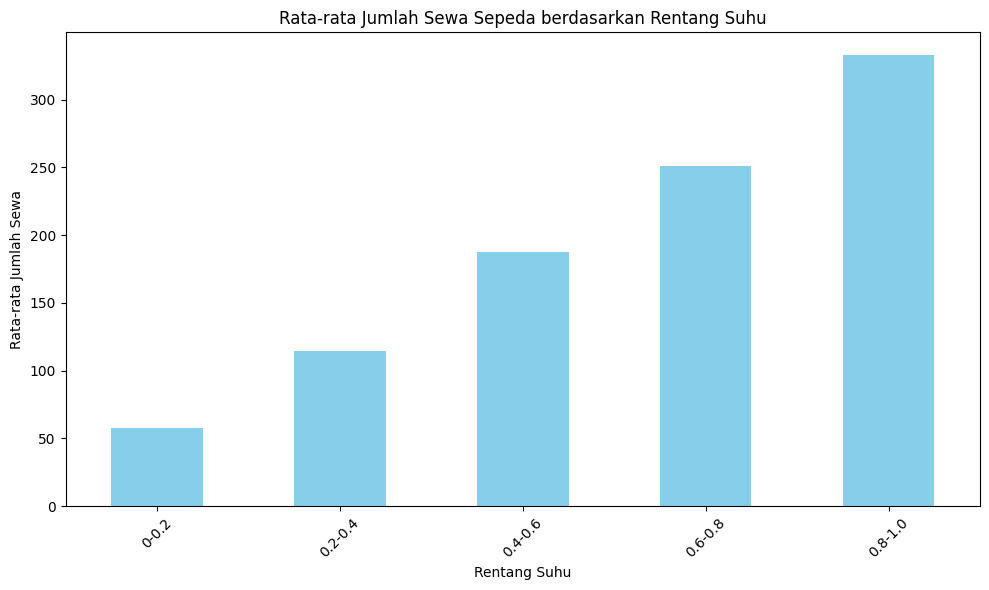

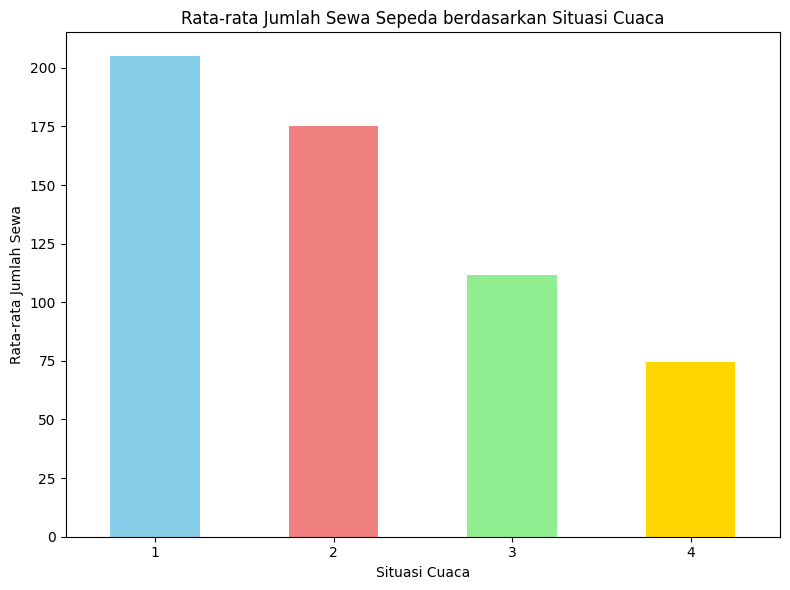

In [14]:
import matplotlib.pyplot as plt

# Visualisasi 1: Suhu vs. Rata-rata Jumlah Sewa
plt.figure(figsize=(10, 6))
temp_rental_avg.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Jumlah Sewa Sepeda berdasarkan Rentang Suhu')
plt.xlabel('Rentang Suhu')
plt.ylabel('Rata-rata Jumlah Sewa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi 2: Situasi Cuaca vs. Rata-rata Jumlah Sewa
plt.figure(figsize=(8, 6))
weather_rental_avg.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Rata-rata Jumlah Sewa Sepeda berdasarkan Situasi Cuaca')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Rata-rata Jumlah Sewa')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Data preparation

### Subtask:
Siapkan data untuk dasbor Streamlit.

Pilih kolom yang relevan, konversi tipe data, dan simpan DataFrame yang disiapkan ke file CSV baru untuk dasbor Streamlit.

In [15]:
# Pilih kolom yang relevan
dashboard_df = df[['dteday', 'season', 'weathersit', 'temp', 'cnt']]

# Ubah 'dteday' ke datetime
dashboard_df['dteday'] = pd.to_datetime(dashboard_df['dteday'])

# Simpan DataFrame yang disiapkan ke file CSV baru
dashboard_df.to_csv('dashboard_data.csv', index=False)

<ipython-input-15-4151018dd12b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dashboard_df['dteday'] = pd.to_datetime(dashboard_df['dteday'])


Perbaiki SettingWithCopyWarning dengan menggunakan .loc untuk mengubah kolom 'dteday' lalu simpan DataFrame ke file CSV.

In [16]:
# Pilih kolom yang relevan
dashboard_df = df[['dteday', 'season', 'weathersit', 'temp', 'cnt']]

# Ubah 'dteday' ke datetime menggunakan .loc
dashboard_df.loc[:, 'dteday'] = pd.to_datetime(dashboard_df['dteday'])

# Simpan DataFrame yang disiapkan ke file CSV baru
dashboard_df.to_csv('dashboard_data.csv', index=False)

## Ringkasan:

### 1. Tanya Jawab

* **Bagaimana suhu memengaruhi penyewaan sepeda?** Suhu yang lebih tinggi berkorelasi dengan jumlah penyewaan sepeda yang lebih tinggi. Analisis menunjukkan korelasi positif sedang (0,40) antara suhu dan jumlah penyewaan. Jumlah penyewaan rata-rata meningkat seiring dengan meningkatnya rentang suhu.
* **Bagaimana situasi cuaca yang berbeda memengaruhi penyewaan sepeda?** Cuaca cerah menyebabkan jumlah penyewaan sepeda yang lebih tinggi. Jumlah penyewaan rata-rata tertinggi untuk situasi cuaca 1 (cerah) dan menurun dengan kondisi cuaca yang semakin buruk.

### 2. Temuan Utama Analisis Data

* **Dampak Suhu:** Korelasi positif sedang (0,40) terjadi antara suhu dan jumlah penyewaan sepeda. Jumlah penyewaan cenderung lebih tinggi pada suhu yang lebih hangat.
* **Dampak Cuaca:** Cuaca cerah (situasi cuaca 1) secara signifikan meningkatkan penyewaan sepeda dibandingkan dengan kondisi cuaca lainnya (2, 3, dan 4). Saat cuaca memburuk, jumlah penyewaan menurun.

### 3. Wawasan atau Langkah Berikutnya

* **Kembangkan pemasaran yang tertarget:** Promosikan penyewaan sepeda selama periode cuaca yang baik dan suhu yang lebih tinggi.
* **Jelajahi musim:** Selidiki bagaimana faktor musiman berinteraksi dengan suhu dan cuaca untuk memengaruhi pola penyewaan.